In [1]:
import pickle
import sys
sys.path.insert(0, '../')
from AircraftIden.data_case.GeneralAircraftCase import GeneralAircraftCase, PX4AircraftCase
from AircraftIden import FreqIdenSIMO, TransferFunctionFit,TransferFunctionModel,TransferFunctionParamModel
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
sp.init_printing()
pkl_name = "/Users/plane/Dropbox/FLYLOG/foam-tail-sitter/cruising/log_34_2018-5-29-freq-res-thrustax.pkl"
thr_freqres = pickle.load(open(pkl_name,"rb"))

In [13]:
def process_status_freqres(freqres):
    freq, H, gamma2, gxx, gxy, gyy = freqres.get_freq_iden(0)
    a,b,c,d,tau,s = sp.symbols("a b c d tau s")
    
    num = d
    den = (b *s + c)
    tfpm = TransferFunctionParamModel(num,den,tau)
    fitter = TransferFunctionFit(freq, H, gamma2, tfpm,nw=20,iter_times=1000,reg = 0)
    tf = fitter.estimate(10,accept_J=10)
    return fitter
#fitter = process_status_freqres(ele_freqres["1m/s"])


In [14]:
status_list = ["8m/s","10m/s"]

def process_status(x):
    print("Status process flying status {}".format(x))
    return process_status_freqres(thr_freqres[x])
ret = map(process_status,status_list)
ret = dict(zip(status_list, ret))

Status process flying status 8m/s
Uknown number 4 [d, c, tau, b]
Found new better 11.927179919940569
Status process flying status 10m/s
Uknown number 4 [d, c, tau, b]
Found new better 8.344480913890186


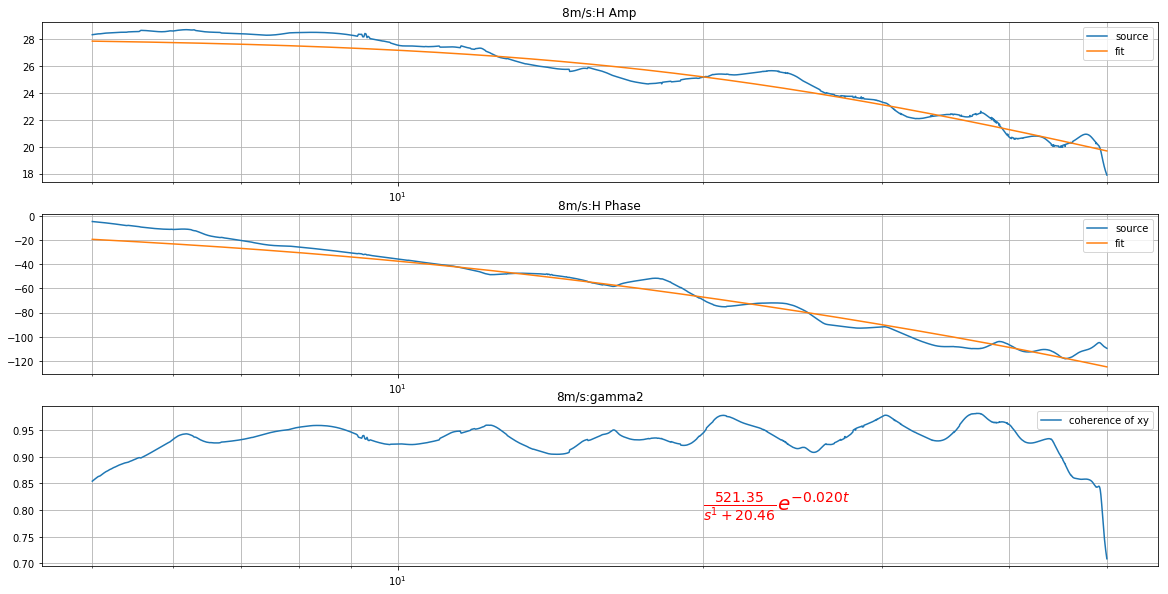

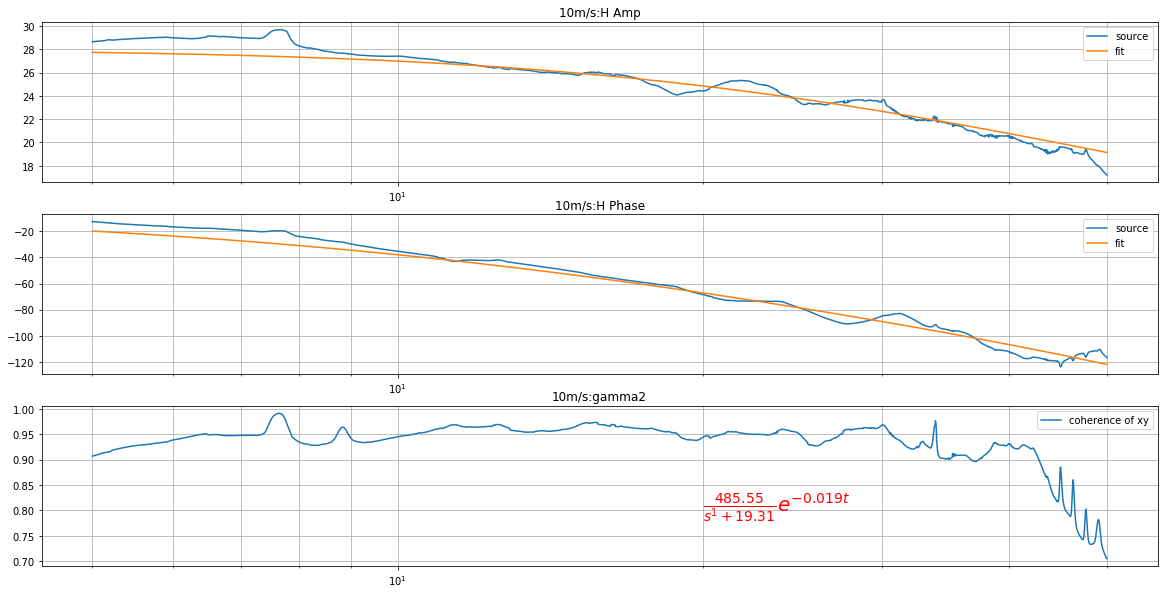

In [17]:
plt.rc('figure', figsize=(20.0, 10.0))
def plot_fitter(fitter, status_name):
    plt.figure(status_name)
    fitter.plot(status_name+":")
    trans_str = fitter.latex()
    plt.text(20, 0.8,trans_str, fontsize=20,color='red')
    plt.show()

    
def poly_latex(poly,cha = "s"):
    ret_str = ""
    ords = len(poly) - 1
    for i in range(ords+1):
        ordn = ords - i
        if ordn == 0:
            ret_str = ret_str + "{:4.2f}".format(poly[i])
        else:
            if (poly[i] == 1):
                ret_str = ret_str + "s^{:d}+".format(ordn) 
            else:
                ret_str = ret_str + "{:4.2f} s^{:d}+".format(poly[i],ordn)
    return ret_str

def transfer_func_latex(num,den,tau):
    return r"$\frac{" + poly_latex(num) + "}{" + poly_latex(den) +"}" + "e^{-" + "{:4.3f}".format(tau) + "t}$"

for status in ret:
    plot_fitter(ret[status],status)